<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Finals/HOA%207.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 7.1** | **Clustering**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 12/05/2024
**Date Submitted**: | 12/05/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 5.1: Clustering

#### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

#### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

#### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Load the dataset and check the first five rows

In [ ]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [ ]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [ ]:
# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

 Calculate the inertia to evaluate how well the formed clusters are.

In [ ]:
# inertia on the fitted data
kmeans.inertia_

2600.3756482224435

Interpret the result of the inertia

<font color = 'blue'> The result means that the average distance between the datapoints and the centroid is 2600, which is high. This suggests that the clusters formed covers a wide area. </font>

Use the elbow curve to determine the optimum number of clusters in Python.



Text(0, 0.5, 'Inertia')

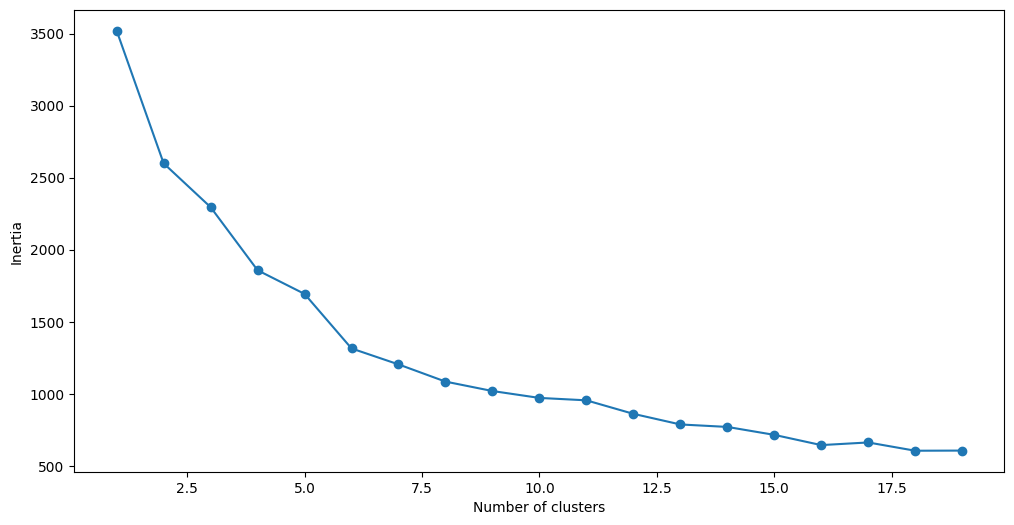

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Interpret the result of the elbow curve.

<font color='blue'> The elbow curve suggests that the optimal number of clusters is 6, given that after that, the difference in inertia is minimal.

Build a model using 5 clusters and k-means ++ initialization

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

,count
cluster,
3,202
1,130
2,91
0,16
4,1


There are 208 data points belonging to cluster 1 (index 1), then 125 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-6.90297086e-01  1.86604160e-01  2.79744286e+00  2.53321722e-01
  -6.50947105e-02  2.73711548e+00 -3.65528618e-01  7.31790248e-01]
 [ 1.44865163e+00  1.62981949e-01 -2.98765563e-01  7.52464459e-01
   9.81280051e-01 -3.31426816e-01  1.02560512e+00  9.57158245e-02]
 [-5.25762569e-01 -1.58328552e+00 -5.21748261e-02 -3.48899093e-01
  -3.92505728e-01  2.62109971e-02 -4.12806976e-01 -1.50559940e-01]
 [-6.37352811e-01  5.90668285e-01 -1.55369842e-02 -3.72768380e-01
  -4.55911321e-01 -4.94760510e-02 -4.42375800e-01 -1.33312842e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]]


What is the purpose of the centroids?

<font color='blue'> Centroids are the center datapoint of a cluster, and this centroid is used to compute for the inertia, which is the evaluation metric of the K-Means algorithm.

Fit an agglomerative clustering model with two clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

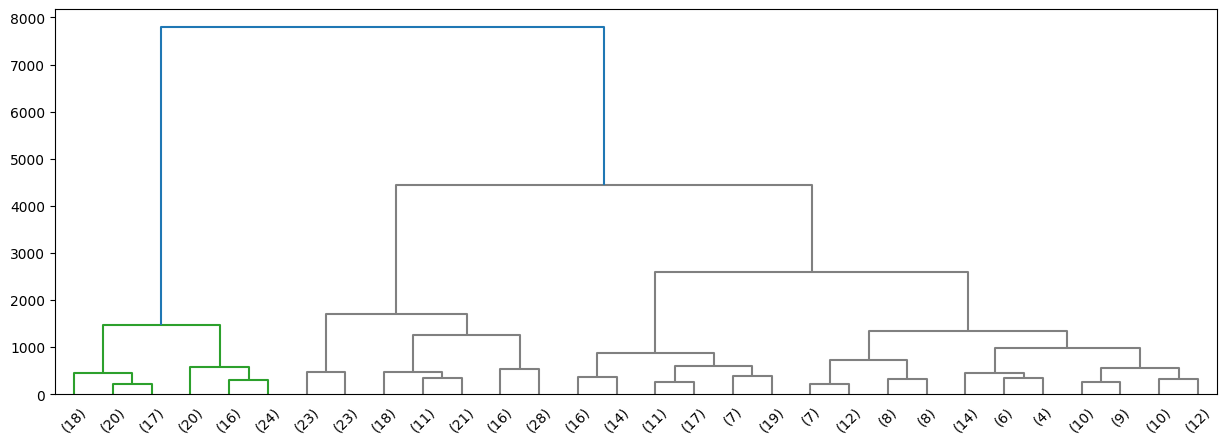

In [ ]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Interpret the result of the dendogram

<font color='blue'> The dendogram suggests that there are two clusters formed by the agglomerative clustering algorithm. The dendogram also suggests that the cluster formed from the green line is a well-defined cluster since it "survived" from being merged.

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters
* Use agglomerative clustering and visualize the dendogram
* Compare the results obtained by the K means and agglomerative clustering.

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

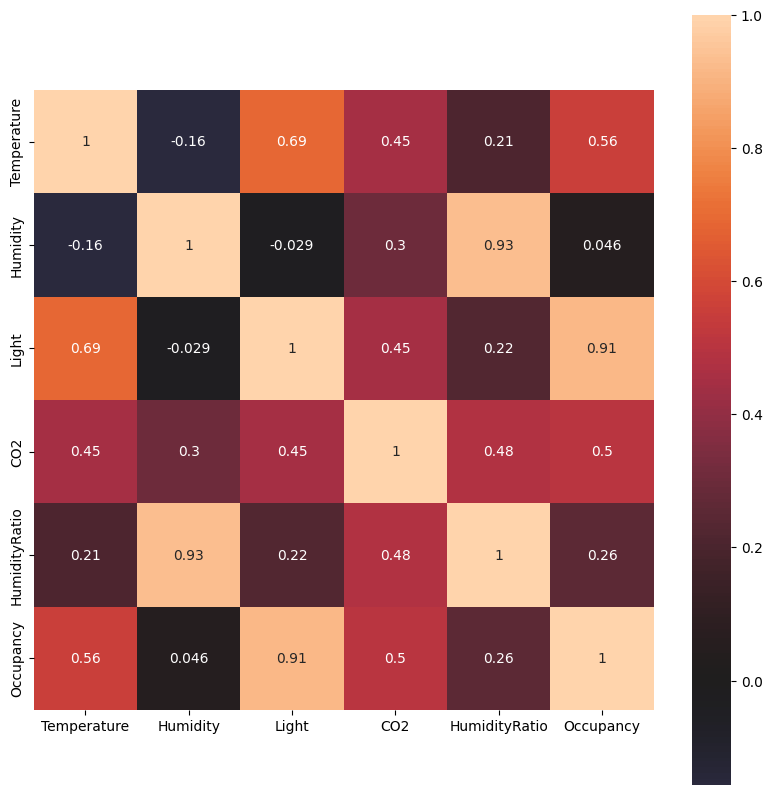

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
# Performing the standardization of features using pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
df_pipe = pipeline.fit_transform(df.drop('Occupancy',axis=1))
df_scaled = pd.DataFrame(df_pipe, columns=df.columns[:-1])
df_scaled

,Temperature,Light,CO2,HumidityRatio
0,0.881869,0.856980,0.368776,0.550205
1,0.884913,0.855411,0.377959,0.552440
2,0.886941,0.854074,0.385456,0.550465
3,0.885674,0.834175,0.389530,0.544843
4,0.890994,0.832768,0.392916,0.550844
...,...,...,...,...
19114,0.362930,0.815549,0.800737,0.405213
19115,0.372496,0.813584,0.804531,0.409764
19116,0.377270,0.813584,0.807387,0.411489
19117,0.377270,0.812071,0.850807,0.422715


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df_scaled.describe()

,Temperature,Light,CO2,HumidityRatio
count,19119.000000,19119.000000,19119.000000,19119.000000
mean,0.386633,0.295490,0.279862,0.413217
std,0.198719,0.372569,0.235528,0.200548
min,0.000000,0.000000,0.000000,0.000000
25%,0.256733,0.000000,0.075027,0.279146
50%,0.358140,0.000000,0.203952,0.428020
75%,0.519867,0.808720,0.427675,0.569148
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_scaled.median()

,0
Temperature,0.358140
Light,0.000000
CO2,0.203952
HumidityRatio,0.428020


In [ ]:
df_scaled.mode().T

,0
Temperature,0.280730
Light,0.000000
CO2,0.036710
HumidityRatio,0.171929


Text(0, 0.5, 'Inertia')

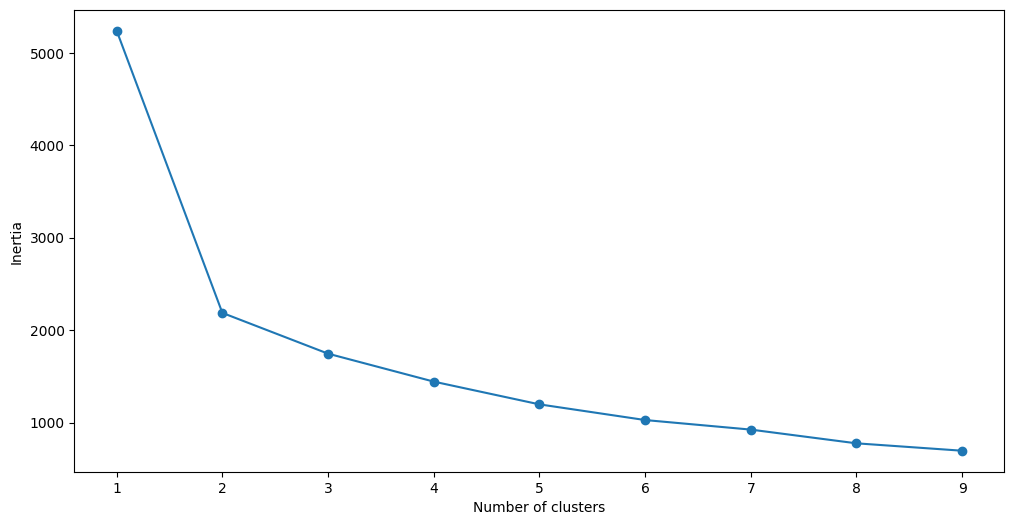

In [ ]:
# Use k-means clustering to identify the groups of the dataset.
# Use 1 to 10 clusters

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Determine the optimum number of clusters
# By using the elbow method, it can be identified
# that the optimal number of clusters is 2

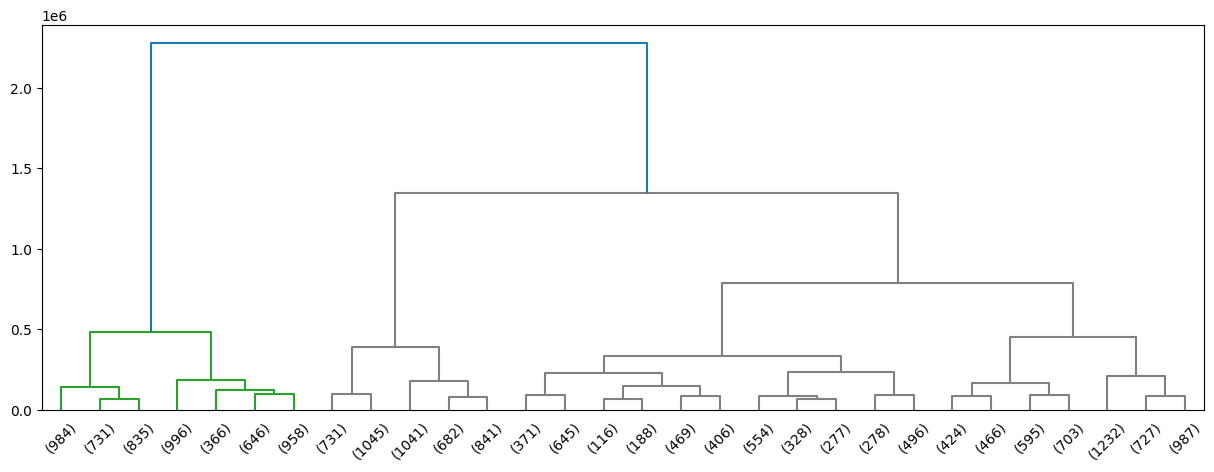

In [ ]:
# Use agglomerative clustering and visualize the dendogram
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(df_scaled)
df['agglom'] = ag.fit_predict(df_scaled)

# Visualization
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

In [ ]:
# Compare the results obtained by the K means and agglomerative clustering.
from sklearn.metrics import pairwise_distances

ag_clusters = ag.fit_predict(df_scaled)

inertia = 0
for i in range(2):
    cluster_points = df_scaled[ag_clusters == i]
    centroid = cluster_points.mean(axis=0)
    inertia += pairwise_distances(cluster_points, [centroid]).sum()

print(f"Inertia of Agglomerative Clustering: {inertia}")

# The inertia found is higher compared to the inertia of the K-Means algorithm
# which is at around 2000 for 2 clusters.

Inertia of Agglomerative Clustering: 6086.967846894189


#### Conclusion

To conclude, clustering is a form of unsupervised learning where we want to group features into clusters which is useful for pattern recognition. In the activity, I performed the K-Means Algorithm which makes use of centroids and inertia to form the clusters with the least distance from the centroid. With the given wholesale customers dataset, the optimal number of clusters is found to be 6 via the elbow method. I also performed the Agglomerative Hierarchical Clustering which would instead merge clusters until we get the desired amount of clusters.

In the supplementary activity, I implemented the K-Means algorithm with varying amount of K from 1-10 and by using the elbow method, I found that the optimal number of clusters are 2. I also implemented the Agglomerative Hierarchical clustering for 2 clusters, and the results suggest that the K-Means algorithm is better to use for my chosen dataset which is the Occupancy dataset.